# Bernoulli, testing deconvolution

In [86]:
import pymc3 as pm
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(font_scale=1.5)

%matplotlib inline

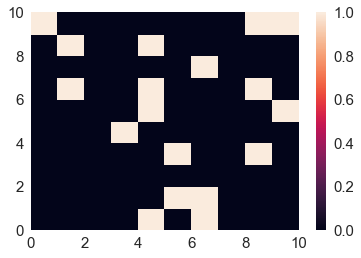

In [25]:
d = np.random.rand(10,10)
d[d>0.75] = 1
d[d<=0.75] = 0
plt.pcolormesh(d)
plt.colorbar()

In [26]:
with pm.Model() as model:
    p = pm.Uniform('p', 0 ,1, shape=(10,10))
    b = pm.Bernoulli('b', p=p, shape=(10,10), observed=d)
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_interval__]
100%|██████████| 5500/5500 [00:19<00:00, 287.57it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f86e9e8>,
      dtype=object)

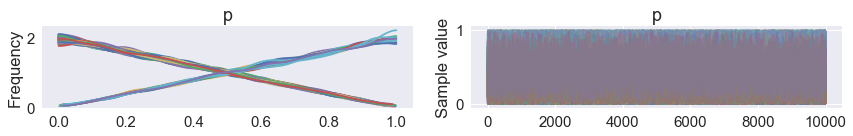

In [52]:
pm.traceplot(trace, combined=True)
# pm.summary(trace)

In [53]:
trace['p'].mean(axis=0).shape

(10, 10)

In [54]:
ppc = pm.sample_ppc(trace, samples=1000, model=model)


100%|██████████| 1000/1000 [00:00<00:00, 1545.79it/s]


In [55]:
np.asarray(ppc['b']).shape


(1000, 10, 10)

In [59]:
np.asarray(ppc['b']).mean(axis=0)

array([[0.347, 0.348, 0.333, 0.335, 0.668, 0.327, 0.655, 0.338, 0.318,
        0.352],
       [0.338, 0.333, 0.332, 0.329, 0.354, 0.682, 0.686, 0.291, 0.352,
        0.354],
       [0.311, 0.346, 0.35 , 0.331, 0.297, 0.356, 0.348, 0.323, 0.31 ,
        0.329],
       [0.342, 0.325, 0.365, 0.301, 0.311, 0.644, 0.351, 0.342, 0.66 ,
        0.343],
       [0.321, 0.34 , 0.339, 0.689, 0.351, 0.335, 0.337, 0.33 , 0.34 ,
        0.313],
       [0.33 , 0.328, 0.346, 0.354, 0.681, 0.312, 0.36 , 0.347, 0.326,
        0.64 ],
       [0.376, 0.685, 0.331, 0.349, 0.696, 0.333, 0.346, 0.338, 0.671,
        0.295],
       [0.344, 0.345, 0.33 , 0.327, 0.28 , 0.321, 0.677, 0.336, 0.34 ,
        0.314],
       [0.319, 0.676, 0.322, 0.346, 0.687, 0.323, 0.356, 0.358, 0.33 ,
        0.355],
       [0.671, 0.337, 0.301, 0.331, 0.336, 0.336, 0.35 , 0.32 , 0.684,
        0.673]])

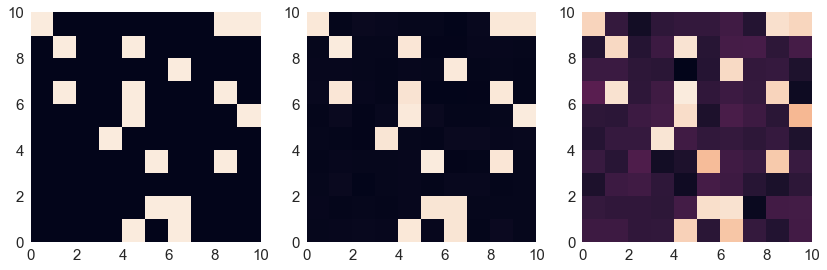

In [61]:
fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].pcolormesh(d)
ax[0].set_aspect('equal')

ax[1].pcolormesh(trace['p'].mean(axis=0))
ax[1].set_aspect('equal')

a = ax[2].pcolormesh(np.asarray(ppc['b']).mean(axis=0))
ax[2].set_aspect('equal')



In [47]:
trace['p'].shape

(10000, 10, 10)

(array([1931., 1683., 1492., 1275., 1030.,  965.,  753.,  468.,  278.,
         125.]),
 array([1.99395455e-04, 9.96891581e-02, 1.99178921e-01, 2.98668683e-01,
        3.98158446e-01, 4.97648209e-01, 5.97137971e-01, 6.96627734e-01,
        7.96117497e-01, 8.95607259e-01, 9.95097022e-01]),
 <a list of 10 Patch objects>)

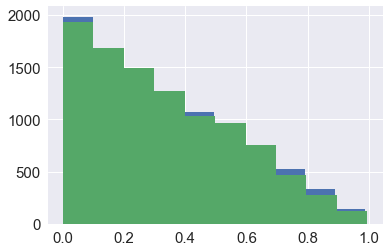

In [49]:
plt.hist(trace['p'][:,0,9])
plt.hist(trace['p'][:,1,9])


(array([687.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 313.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

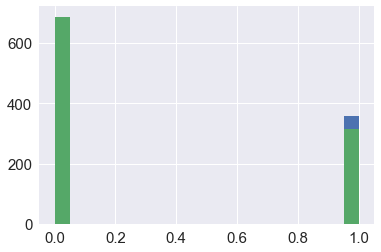

In [51]:
plt.hist(np.asarray(ppc['b'])[:,0,9], 20)
plt.hist(np.asarray(ppc['b'])[:,1,9], 20)


## and convolve with a kernel

In [79]:
a = np.array([[1, 2, 0, 0],
   [5, 3, 0, 4],
    [0, 0, 0, 7],
    [9, 3, 0, 0]])
k = np.array([[0,1,0],[1,1,1],[0,1,0]])
from scipy import ndimage
k

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

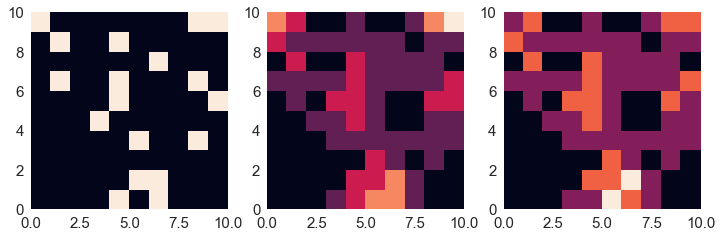

In [80]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].pcolormesh(d)
ax[1].pcolormesh(ndimage.convolve(d, k, mode='reflect',))# cval=0.0))
ax[2].pcolormesh(ndimage.convolve(d, k, mode='constant'))#, cval=0.0))

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')



In [95]:
with pm.Model() as model:
    p = pm.Uniform('p', 0 ,1, shape=(10,10))
    b = pm.Bernoulli('b', p=p, shape=(10,10), observed=d)
    sm = pm.Deterministic('sm', ndimage.convolve(b, k, mode='constant') )
    trace = pm.sample(5000)

RuntimeError: filter weights array has incorrect shape.